# Business Understanding

eCommerce has taken over the retail space making it close to impossible for brick and mortar stores to compete with larger retailers such as Amazon, Target, or Walmart.  Over the years we have seen stores begin to close their doors due to the innability to keep up with online competitors.

Goodreads is an online social platform which gives readers the ability to share and rank their most recent books read.  Once a user marks a book read or rates the book, the platform will recommend a new book to the user. A recent study was done which showed 93% of customers will read online reviews prior to purchasing. 

Barnes and Noble is looking to understand what books should be showcased in their stores.  They are looking to get ahead of the game by utilizing a model which can predict the rating of a book on the most ppular book reviewed site.

Barnes and Noble is looking to rebrand their company by partnering with goodreads.  They are looking for a model to be created which can predict what a customer will rank a book before even reading.  A recent study was done which showed 93% of customers will read online reviews prior to purchasing.  By focusing on a predictive model, this will help retain customers by creating a new avenue of personalization.

# Data Understanding

This dataset contains more than 1.3M book reviews about 25,475 books and 18,892 users.  It was found through the Kaggle Good Reads Book Competition.  A train & test set are provided.

The dataset of this competition is taken from UCSD Book Graph.

## Import Packages

Import necessary packages to load datasets and begin EDA.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Load both the train and test CSV to view what each entails.

In [109]:
df = pd.read_csv("Data/goodreads_train.csv")

## Previewing Data

Load information on train dataset.

### Data Information

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


### Data Head

View first five rows of train dataset.

In [111]:
df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [112]:
df.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0
899999,b9450d1c1f97f891c392b1105959b56e,17005,d55f3a967230940e75a314700caec9a5,3,** spoiler alert ** \n 3.5 stars \n I liked it...,Sun Nov 11 00:05:43 -0800 2012,Sun Nov 11 21:59:08 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,Sun Nov 11 00:00:00 -0800 2012,0,0


## Data Preperation

### Null Values

Looking at the null values we will be able to make a better decision on what to do with those two columns once we explore the data a little deeper.

In [113]:
df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [114]:
df.read_at = df.read_at.fillna(value = "0")

In [115]:
df.started_at = df.started_at.fillna(value = "N/A")

In [116]:
df.isna().sum()

user_id         0
book_id         0
review_id       0
rating          0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

## Exploring Columns

### user_id

User Id is the numerical number given to a user.  This is their unique identifier.  There are 12,188 User id's in this dataset.

In [117]:
user = len(pd.unique(df['user_id']))
  
print("No.of.unique values :", 
      user)

No.of.unique values : 12188


### book_id

Book Id is the numerical number given to a book.  This is their unique identifier.  There are 25,474 book id's in this dataset.

In [118]:
book = len(pd.unique(df['book_id']))
  
print("No.of.unique values :", 
      book)

No.of.unique values : 25474


### review_id

Review id is the numerical number given to an individual review.  There are 900,000 unique reviews within this dataset.  This means that that every row is an individual review.

In [119]:
review = len(pd.unique(df['review_id']))
  
print("No.of.unique values :", 
      review)

No.of.unique values : 900000


### rating

Rating is the number which is given during a review.  0 is the lowest score you can receive and 5 is the highest score you can receive.

In [120]:
df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

### n_votes

Votes is the number of votes which a review contains.

In [121]:
df['n_votes'].value_counts(normalize=True)

0       0.581260
1       0.157020
2       0.069991
3       0.040274
4       0.026211
          ...   
894     0.000001
591     0.000001
291     0.000001
387     0.000001
1023    0.000001
Name: n_votes, Length: 540, dtype: float64

In [122]:
n_votes_data = df.groupby('rating').mean()['n_votes'].sort_values().reset_index()

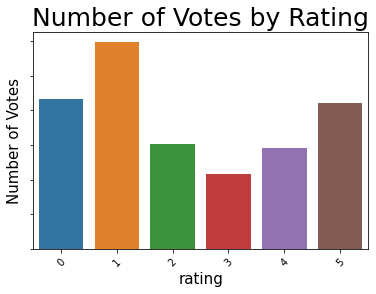

In [123]:
ax = sns.barplot(x = 'rating', y = 'n_votes', data=n_votes_data)
ax.set_xlabel('rating', size = 15)
ax.set_ylabel('Number of Votes', size = 15)
ax.set_title('Number of Votes by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

### n_comments

In [124]:
df['n_comments'].value_counts(normalize=True)

0      0.837780
2      0.040009
1      0.039028
3      0.017184
4      0.014027
         ...   
221    0.000001
222    0.000001
223    0.000001
225    0.000001
170    0.000001
Name: n_comments, Length: 236, dtype: float64

In [125]:
n_comments_data = df.groupby('rating').mean()['n_comments'].sort_values().reset_index()

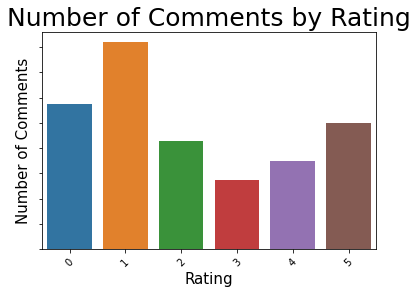

In [126]:
ax = sns.barplot(x = 'rating', y = 'n_comments', data=n_comments_data)
ax.set_xlabel('Rating', size = 15)
ax.set_ylabel('Number of Comments', size = 15)
ax.set_title('Number of Comments by Rating', size = 25)
ax.tick_params(axis='x', rotation=45)
ax.set(yticklabels=[]);

## Word Cloud

In [127]:
Five_rating = " ".join(review for review in df[df["rating"]==5]['review_text'])
Four_Rating = " ".join(review for review in df[df["rating"]==4]['review_text'])
Three_Rating = " ".join(review for review in df[df["rating"]==3]['review_text'])
Two_Rating = " ".join(review for review in df[df["rating"]==2]['review_text'])
One_Rating = " ".join(review for review in df[df["rating"]==1]['review_text'])

### Word Cloud Five Rating

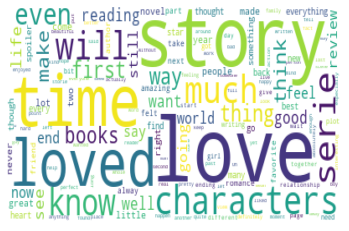

In [128]:
from wordcloud import WordCloud, STOPWORDS

wc_stopwords= set(STOPWORDS)
wc_new_words = ["book", "read", "character", "really", "one"]
wc_new_stopwords=wc_stopwords.union(wc_new_words)

wordcloud_five = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Five_rating)

# Display the generated image:
plt.imshow(wordcloud_five, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Four Rating

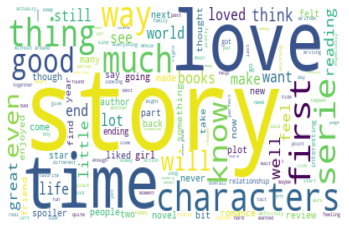

In [129]:
wordcloud_four = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Four_Rating)

# Display the generated image:
plt.imshow(wordcloud_four, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Three Rating

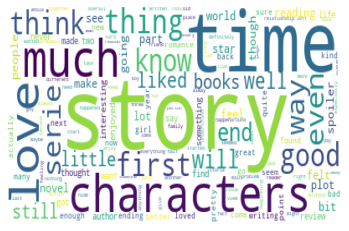

In [130]:
wordcloud_three = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Three_Rating)

# Display the generated image:
plt.imshow(wordcloud_three, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud Two Rating

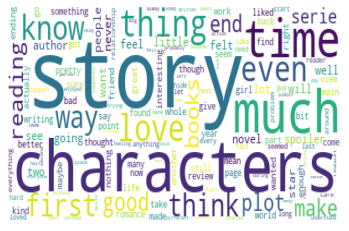

In [131]:
wordcloud_two = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(Two_Rating)

# Display the generated image:
plt.imshow(wordcloud_two, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

### Word Cloud One Rating

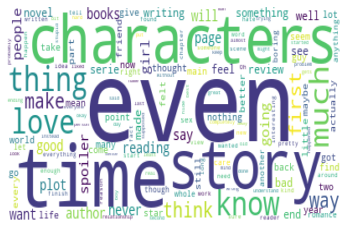

In [132]:
wordcloud_one = WordCloud(collocations=False,background_color="white", max_words=150, stopwords=wc_new_stopwords).generate(One_Rating)

# Display the generated image:
plt.imshow(wordcloud_one, interpolation='bilinear',aspect="auto")
plt.axis("off")
# store to file
plt.show()

# Sample Data

In [133]:
sample_df = df.sample(n = 100000)

In [134]:
sample_df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
134521,42f0a7cb849df52c7b4950ce0a5bf876,15808775,f5c78f7552105ab287527d6081b3e6ac,5,I wasn't expecting to like this book as much a...,Sat Aug 09 11:21:11 -0700 2014,Thu Nov 17 09:54:15 -0800 2016,Thu Nov 17 09:54:15 -0800 2016,Thu Nov 17 00:00:00 -0800 2016,0,0
438265,c432c8461446f67f7208cbe56870d07b,13138635,5063c5add7231a7cfaa540301d758f13,4,Wow! I'm loving the space scifi recently! This...,Thu Jan 30 14:18:22 -0800 2014,Sat Feb 01 12:27:29 -0800 2014,Sat Feb 01 12:27:29 -0800 2014,Mon Jan 27 00:00:00 -0800 2014,0,0
201259,0bd70b61e8fdb23fc4b9989cba122fca,23848058,fcfcdd5a93a845371383f18d68b327a8,2,I guessed the ending of this book because it w...,Tue May 09 19:12:13 -0700 2017,Fri May 26 13:27:42 -0700 2017,Fri May 26 13:27:42 -0700 2017,Mon May 08 00:00:00 -0700 2017,1,2
829837,d87366cc2290a0b3678262337538890e,30724132,52494a689ec4835605faed914f39ce71,5,I would recommend this book to anyone who's in...,Thu Jan 26 15:10:10 -0800 2017,Mon May 22 04:02:50 -0700 2017,Sat Mar 04 05:04:04 -0800 2017,Fri Mar 03 04:00:54 -0800 2017,0,0
335778,b81247e87467cb9bbe18372bf303f5ce,16248068,fb350f575d8066adc7330d211b6483d4,4,This entire series has given me such conflicti...,Fri Mar 07 22:02:10 -0800 2014,Sat Mar 08 23:19:49 -0800 2014,Sun Mar 09 23:19:49 -0700 2014,Sat Mar 08 00:00:00 -0800 2014,0,1


In [135]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 134521 to 278604
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  object
 1   book_id       100000 non-null  int64 
 2   review_id     100000 non-null  object
 3   rating        100000 non-null  int64 
 4   review_text   100000 non-null  object
 5   date_added    100000 non-null  object
 6   date_updated  100000 non-null  object
 7   read_at       100000 non-null  object
 8   started_at    100000 non-null  object
 9   n_votes       100000 non-null  int64 
 10  n_comments    100000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.2+ MB


In [136]:
sample_df['rating'].value_counts()

4    34987
5    29417
3    21022
2     8098
0     3343
1     3133
Name: rating, dtype: int64

## Drop Columns

In [137]:
sample_df.drop(columns=['user_id', 'book_id', 'review_id', 'date_added', 'date_updated',
                'started_at', 'read_at', 'n_votes', 'n_comments'], inplace = True)

In [138]:
sample_df.head()

,rating,review_text
134521,5,I wasn't expecting to like this book as much a...
438265,4,Wow! I'm loving the space scifi recently! This...
201259,2,I guessed the ending of this book because it w...
829837,5,I would recommend this book to anyone who's in...
335778,4,This entire series has given me such conflicti...


In [182]:
sample_df.drop(sample_df[(df['rating'] == 0)].index, inplace=True)

sample_df

<ipython-input-182-48406b2263ef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df.drop(sample_df[(df['rating'] == 0)].index, inplace=True)


,rating,review_text
134521,5,I wasn't expecting to like this book as much a...
438265,4,Wow! I'm loving the space scifi recently! This...
201259,2,I guessed the ending of this book because it w...
829837,5,I would recommend this book to anyone who's in...
335778,4,This entire series has given me such conflicti...
...,...,...
736113,5,This review was originally posted on Addicted ...
808125,3,This historical romance was okay. The plot was...
396343,4,Had an epic ending when Carrie explodes at the...
385151,4,This is a great choice for middle graders who ...


In [183]:
sample_df['rating'].value_counts()

4    34987
5    29417
3    21022
2     8098
1     3133
Name: rating, dtype: int64

# Train Test Split

In [184]:
from sklearn.model_selection import train_test_split

X = sample_df.drop("rating", axis = 1)
y = sample_df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

# Standardizing

Run the cell below to view some examples of the features:

In [185]:
train_sample = X_train.sample(5, random_state=22)
train_sample["label"] = [y_train[val] for val in train_sample.index]
train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label
660802,"So, I've read this book for the first time over a year ago, and it's still stuck with me as one of the best M/M I've read. It was also the first - first I've bought, first I've read, and was the one to make me fall in love with the genre. Jay Bell has this thing of making you care about the characters that I'm yet to find similar. Even de side characters were amazing ones - Alison, Ben's parentes, THE PETS!!! But the best part of it is how HUMAN this characters are. Ben had a past - a filthy, sexual one - because of course he was experimenting with his sexuality. Tim had a lot - A LOT - of flaws, but his heart was on the right place. Jace was absolutely perfect, and I'll never get over him :( Also, the thing about the whole series and the POV changing is awesome - how can you dislike a character so much in a book and get to love him in another is beautiful - and one more example of how talented this author is. Five stars. I'd give more if I could, honestly.",5
333929,"EH. I have neither positive nor negative feelings about this book. I am glad to be done with it, I am glad to have read it, the first Cyberpunk, but I'm glad it's over. The book discussion on this one should be interesting.",2
543310,Finished it SUUUPER fast but it was suuuper short and it was super meh.,3
673373,"Patricia Briggs is one of my favourite authors. I love her Werewolf/Fae/Vampire world. This is another fabulous edition to her Alpha and Omega series. I am so glad we get to see more of Charles, Anna and Bran who we have seen pop up sometimes in her other series (Mercedes Thompson Series) I can not wait to find out how what they Fae did at the end of this is going to affect the Werewolves in the next book from both of these series. Charles and Anna are having trouble with their relationship due to the role Charles plays as the boogeyman of the wolves. The FBI needs help to find a serial killer who has been killing werewolves, Anna goes to help as a werewolf consultant taking Charles as her bodyguard. Can they catch the killer before they become the next victim. Brilliant plot, full of action, awesome as always.. :)",5
522884,"Where I got the book: my bookshelf. A re-read. I have always tended to quote Possession as one of my favorite books, but... Do you find that every so often you re-read a favorite and feel like this is probably the last time you're going to read it? Well, it was like that. I just didn't get that luminous glow from Byatt's writing that I always have in the past, although naturally I admire her brilliance and especially the ability to write original poetry in two different styles that come across as absolutely true to the period. This is a dual time period story, of two academics with a really bad record as far as relationships are concerned exploring the relationship between two Victorian poets. The possession of the title refers, in typically Byattian metaphysics, to possessive love, to possession of the truth, to physical possession of the objects the poets have left behind them. The story proceeds through both narrative and document, Byatt being quite capable of inventing an entire world of materials (letters, poetry, disquisitions and stories) to build such a convincing reality that you could almost find yourself looking up Randolph Henry Ash on the internet. After writing those words I tried that very thing, and found that he and Christabel have many fans--they have, in fact, a weird kind of ongoing life in virtual reality, which speaks volumes for Byatt's ability to bring an utterly convincing nineteenth century world into being. And yet...perhaps it's because my allegiance is shifting to Hilary Mantel with her shiny dialogue and pithy, short bits of narrative that I now find Possession just a touch staid and dated, a ghost of my earnest, classics-reading youth. The bloom is off the rose, the fizz is off the champagne, and while I'll always remember Randolph, Christabel, Roland and Maud with fondness 

In [186]:
review_sample = train_sample.iloc[0]["review_text"]
review_sample

"So, I've read this book for the first time over a year ago, and it's still stuck with me as one of the best M/M I've read. It was also the first - first I've bought, first I've read, and was the one to make me fall in love with the genre. \n Jay Bell has this thing of making you care about the characters that I'm yet to find similar. Even de side characters were amazing ones - Alison, Ben's parentes, THE PETS!!! \n But the best part of it is how HUMAN this characters are. Ben had a past - a filthy, sexual one - because of course he was experimenting with his sexuality. Tim had a lot - A LOT - of flaws, but his heart was on the right place. Jace was absolutely perfect, and I'll never get over him :( \n Also, the thing about the whole series and the POV changing is awesome - how can you dislike a character so much in a book and get to love him in another is beautiful - and one more example of how talented this author is. \n Five stars. I'd give more if I could, honestly."

In [187]:
review_sample.lower()

"so, i've read this book for the first time over a year ago, and it's still stuck with me as one of the best m/m i've read. it was also the first - first i've bought, first i've read, and was the one to make me fall in love with the genre. \n jay bell has this thing of making you care about the characters that i'm yet to find similar. even de side characters were amazing ones - alison, ben's parentes, the pets!!! \n but the best part of it is how human this characters are. ben had a past - a filthy, sexual one - because of course he was experimenting with his sexuality. tim had a lot - a lot - of flaws, but his heart was on the right place. jace was absolutely perfect, and i'll never get over him :( \n also, the thing about the whole series and the pov changing is awesome - how can you dislike a character so much in a book and get to love him in another is beautiful - and one more example of how talented this author is. \n five stars. i'd give more if i could, honestly."

## Standardize Full Dataset

In [188]:
train_sample["review_text"] = train_sample["review_text"].str.lower()

train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label
660802,"so, i've read this book for the first time over a year ago, and it's still stuck with me as one of the best m/m i've read. it was also the first - first i've bought, first i've read, and was the one to make me fall in love with the genre. jay bell has this thing of making you care about the characters that i'm yet to find similar. even de side characters were amazing ones - alison, ben's parentes, the pets!!! but the best part of it is how human this characters are. ben had a past - a filthy, sexual one - because of course he was experimenting with his sexuality. tim had a lot - a lot - of flaws, but his heart was on the right place. jace was absolutely perfect, and i'll never get over him :( also, the thing about the whole series and the pov changing is awesome - how can you dislike a character so much in a book and get to love him in another is beautiful - and one more example of how talented this author is. five stars. i'd give more if i could, honestly.",5
333929,"eh. i have neither positive nor negative feelings about this book. i am glad to be done with it, i am glad to have read it, the first cyberpunk, but i'm glad it's over. the book discussion on this one should be interesting.",2
543310,finished it suuuper fast but it was suuuper short and it was super meh.,3
673373,"patricia briggs is one of my favourite authors. i love her werewolf/fae/vampire world. this is another fabulous edition to her alpha and omega series. i am so glad we get to see more of charles, anna and bran who we have seen pop up sometimes in her other series (mercedes thompson series) i can not wait to find out how what they fae did at the end of this is going to affect the werewolves in the next book from both of these series. charles and anna are having trouble with their relationship due to the role charles plays as the boogeyman of the wolves. the fbi needs help to find a serial killer who has been killing werewolves, anna goes to help as a werewolf consultant taking charles as her bodyguard. can they catch the killer before they become the next victim. brilliant plot, full of action, awesome as always.. :)",5
522884,"where i got the book: my bookshelf. a re-read. i have always tended to quote possession as one of my favorite books, but... do you find that every so often you re-read a favorite and feel like this is probably the last time you're going to read it? well, it was like that. i just didn't get that luminous glow from byatt's writing that i always have in the past, although naturally i admire her brilliance and especially the ability to write original poetry in two different styles that come across as absolutely true to the period. this is a dual time period story, of two academics with a really bad record as far as relationships are concerned exploring the relationship between two victorian poets. the possession of the title refers, in typically byattian metaphysics, to possessive love, to possession of the truth, to physical possession of the objects the poets have left behind them. the story proceeds through both narrative and document, byatt being quite capable of inventing an entire world of materials (letters, poetry, disquisitions and stories) to build such a convincing reality that you could almost find yourself looking up randolph henry ash on the internet. after writing those words i tried that very thing, and found that he and christabel have many fans--they have, in fact, a weird kind of ongoing life in virtual reality, which speaks volumes for byatt's ability to bring an utterly convincing nineteenth century world into being. and yet...perhaps it's because my allegiance is shifting to hilary mantel with her shiny dialogue and pithy, short bits of narrative that i now find possession just a touch staid and dated, a ghost of my earnest, classics-reading youth. the bloom is off the rose, the fizz is off the champagne, and while i'll always remember randolph, christabel, roland and maud with fondness 

In the cell below, perform the same operation on the full X_train:

In [189]:
X_train["review_text"] = X_train["review_text"].str.lower()
X_test["review_text"] = X_test["review_text"].str.lower()

<ipython-input-189-3ce4d377adb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["review_text"] = X_train["review_text"].str.lower()
<ipython-input-189-3ce4d377adb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["review_text"] = X_test["review_text"].str.lower()


In [190]:
X_train.iloc[100]["review_text"]

'the book was hard to read at times, slow and confusing. however, i just finished it and i feel like it was worth it. i eventually got connected to the characters, and got used to the writing style. i feel like four stars is a bit too much but it left me feeling happy and satisfied.'

# Tokenizing

In [191]:
review_sample2 = train_sample.iloc[1]["review_text"]
review_sample2

"eh. i have neither positive nor negative feelings about this book. i am glad to be done with it, i am glad to have read it, the first cyberpunk, but i'm glad it's over. the book discussion on this one should be interesting."

In [192]:
review_sample2.split()[:10]

['eh.',
 'i',
 'have',
 'neither',
 'positive',
 'nor',
 'negative',
 'feelings',
 'about',
 'this']

In [193]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(review_sample2)[:10]

['eh',
 'have',
 'neither',
 'positive',
 'nor',
 'negative',
 'feelings',
 'about',
 'this',
 'book']

## Tokenizing Full Dataset

In [194]:
train_sample["text_tokenized"] = train_sample["review_text"].apply(tokenizer.tokenize)

train_sample.style.set_properties(**{'text-align': 'left'})

,review_text,label,text_tokenized
660802,"so, i've read this book for the first time over a year ago, and it's still stuck with me as one of the best m/m i've read. it was also the first - first i've bought, first i've read, and was the one to make me fall in love with the genre. jay bell has this thing of making you care about the characters that i'm yet to find similar. even de side characters were amazing ones - alison, ben's parentes, the pets!!! but the best part of it is how human this characters are. ben had a past - a filthy, sexual one - because of course he was experimenting with his sexuality. tim had a lot - a lot - of flaws, but his heart was on the right place. jace was absolutely perfect, and i'll never get over him :( also, the thing about the whole series and the pov changing is awesome - how can you dislike a character so much in a book and get to love him in another is beautiful - and one more example of how talented this author is. five stars. i'd give more if i could, honestly.",5,"['so', 've', 'read', 'this', 'book', 'for', 'the', 'first', 'time', 'over', 'year', 'ago', 'and', 'it', 'still', 'stuck', 'with', 'me', 'as', 'one', 'of', 'the', 'best', 've', 'read', 'it', 'was', 'also', 'the', 'first', 'first', 've', 'bought', 'first', 've', 'read', 'and', 'was', 'the', 'one', 'to', 'make', 'me', 'fall', 'in', 'love', 'with', 'the', 'genre', 'jay', 'bell', 'has', 'this', 'thing', 'of', 'making', 'you', 'care', 'about', 'the', 'characters', 'that', 'yet', 'to', 'find', 'similar', 'even', 'de', 'side', 'characters', 'were', 'amazing', 'ones', 'alison', 'ben', 'parentes', 'the', 'pets', 'but', 'the', 'best', 'part', 'of', 'it', 'is', 'how', 'human', 'this', 'characters', 'are', 'ben', 'had', 'past', 'filthy', 'sexual', 'one', 'because', 'of', 'course', 'he', 'was', 'experimenting', 'with', 'his', 'sexuality', 'tim', 'had', 'lot', 'lot', 'of', 'flaws', 'but', 'his', 'heart', 'was', 'on', 'the', 'right', 'place', 'jace', 'was', 'absolutely', 'perfect', 'and', 'll', 'never', 'get', 'over', 'him', 'also', 'the', 'thing', 'about', 'the', 'whole', 'series', 'and', 'the', 'pov', 'changing', 'is', 'awesome', 'how', 'can', 'you', 'dislike', 'character', 'so', 'much', 'in', 'book', 'and', 'get', 'to', 'love', 'him', 'in', 'another', 'is', 'beautiful', 'and', 'one', 'more', 'example', 'of', 'how', 'talented', 'this', 'author', 'is', 'five', 'stars', 'give', 'more', 'if', 'could', 'honestly']"
333929,"eh. i have neither positive nor negative feelings about this book. i am glad to be done with it, i am glad to have read it, the first cyberpunk, but i'm glad it's over. the book discussion on this one should be interesting.",2,"['eh', 'have', 'neither', 'positive', 'nor', 'negative', 'feelings', 'about', 'this', 'book', 'am', 'glad', 'to', 'be', 'done', 'with', 'it', 'am', 'glad', 'to', 'have', 'read', 'it', 'the', 'first', 'cyberpunk', 'but', 'glad', 'it', 'over', 'the', 'book', 'discussion', 'on', 'this', 'one', 'should', 'be', 'interesting']"
543310,finished it suuuper fast but it was suuuper short and it was super meh.,3,"['finished', 'it', 'suuuper', 'fast', 'but', 'it', 'was', 'suuuper', 'short', 'and', 'it', 'was', 'super', 'meh']"
673373,"patricia briggs is one of my favourite authors. i love her werewolf/fae/vampire world. this is another fabulous edition to her alpha and omega series. i am so glad we get to see more of charles, anna and bran who we have seen pop up sometimes in her other series (mercedes thompson series) i can not wait to find out how what they fae did at the end of this is going to affect the werewolves in the next book from both of these series. charles and anna are having trouble with their relationship due to the role charles plays as the boogeyman of the wolves. the fbi needs help to find a serial killer who has been killing werewolves, anna goes to help as a werewolf consultant taking charles as her bodyguard. can they catch the killer before they become the next victim. brilliant plot, full of 

Create new column with tokenized data

In [195]:
X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)

<ipython-input-195-d41133729210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_tokenized"] = X_train["review_text"].apply(tokenizer.tokenize)
<ipython-input-195-d41133729210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["text_tokenized"] = X_test["review_text"].apply(tokenizer.tokenize)


In [196]:
X_train.iloc[100]["text_tokenized"][:20]

['the',
 'book',
 'was',
 'hard',
 'to',
 'read',
 'at',
 'times',
 'slow',
 'and',
 'confusing',
 'however',
 'just',
 'finished',
 'it',
 'and',
 'feel',
 'like',
 'it',
 'was']

## Exploratory Data Analysis: Frequency Distributions

In [197]:
from nltk import FreqDist

example_freq_dist = FreqDist(X_train.iloc[100]["text_tokenized"][:20])
example_freq_dist

FreqDist({'was': 2, 'and': 2, 'it': 2, 'the': 1, 'book': 1, 'hard': 1, 'to': 1, 'read': 1, 'at': 1, 'times': 1, ...})

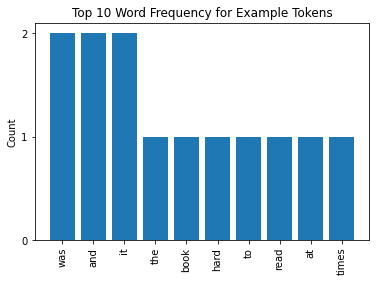

In [198]:
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    
visualize_top_10(example_freq_dist, "Top 10 Word Frequency for Example Tokens")

## Visualizing the Frequency Distribution for the Full Dataset

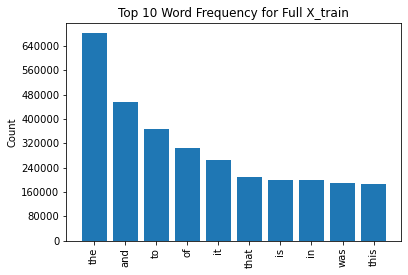

In [199]:
train_freq_dist = FreqDist(X_train["text_tokenized"].explode())

visualize_top_10(train_freq_dist, "Top 10 Word Frequency for Full X_train")

# Removing Stopwords

# Baseline Model with TfidVectorizer and MultinomialNB

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

X_train_vectorized = tfidf.fit_transform(X_train["review_text"])
X_test_vectorized = tfidf.transform(X_test["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,10,100,ability,able,about,absolutely,across,act,action,actions,...,yeah,year,years,yes,yet,you,young,younger,your,yourself
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.090503,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.163284,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.079940,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.059245,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.183722,0.000000,0.0,0.097590,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72487,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.039896,0.0,0.0,0.182488,0.000000,0.0,0.000000,0.000000
72488,0.0,0.0,0.0,0.083033,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.085507,0.000000,0.0,0.000000,0.000000
72489,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
72490,0.0,0.0,0.0,0.000000,0.041994,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.021704,0.000000,0.0,0.034587,0.052411


In [202]:
assert X_train_vectorized.shape[0] == X_train.shape[0]

assert X_train_vectorized.shape[1] == 1000

In [203]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

baseline_model = MultinomialNB()

baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.45982482, 0.45747983, 0.46413298, 0.46392606, 0.46247758])

In [204]:
y_train.value_counts(normalize=True)

4    0.361971
5    0.304351
3    0.217486
2    0.083775
1    0.032417
Name: rating, dtype: float64

In [205]:
from sklearn.metrics import classification_report

baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       783
           2       0.50      0.00      0.00      2025
           3       0.43      0.08      0.13      5256
           4       0.41      0.82      0.55      8747
           5       0.64      0.48      0.55      7354

    accuracy                           0.46     24165
   macro avg       0.40      0.28      0.25     24165
weighted avg       0.48      0.46      0.39     24165



/Users/henryvangorp/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Removing Stopwords

In [162]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:20]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henryvangorp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [163]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [164]:
# Run this cell without changes
tokens_example = X_train.iloc[100]["text_tokenized"]
print("Length with stopwords:", len(tokens_example))

tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))

Length with stopwords: 543
Length without stopwords: 262


In [165]:
X_train["text_without_stopwords"] = X_train["text_tokenized"].apply(remove_stopwords)

<ipython-input-165-8ea6976fb268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["text_without_stopwords"] = X_train["text_tokenized"].apply(remove_stopwords)


In [166]:
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["review_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,10,100,ability,able,absolutely,across,act,action,actions,actual,...,wrong,wrote,ya,yeah,year,years,yes,yet,young,younger
0,0.0,0.0,0.0,0.0,0.094969,0.00000,0.0,0.091932,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.077608,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
74996,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.104451,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
74997,0.0,0.0,0.0,0.0,0.000000,0.07393,0.0,0.000000,0.000000,0.0,...,0.061889,0.0,0.129281,0.073292,0.0,0.000000,0.0,0.0,0.0,0.0
74998,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [167]:
stopwords_removed_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
stopwords_removed_cv

array([0.45473333, 0.44633333, 0.45293333, 0.4498    , 0.4456    ])

In [168]:
baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       836
           1       0.00      0.00      0.00       783
           2       0.00      0.00      0.00      2024
           3       0.19      0.00      0.00      5256
           4       0.35      0.96      0.51      8747
           5       0.28      0.03      0.06      7354

    accuracy                           0.35     25000
   macro avg       0.14      0.17      0.10     25000
weighted avg       0.25      0.35      0.20     25000



/Users/henryvangorp/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Custom Tokens

In [170]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [171]:
print("Original sample:", X_train.iloc[100]["text_tokenized"][20:30])
print("Stemmed sample: ", stem_and_tokenize(X_train.iloc[100]["review_text"])[20:30])

Original sample: ['once', 'in', 'single', 'sitting', 'well', 'technically', 'not', 'read', 'per', 'say']
Stemmed sample:  ['onc', 'in', 'singl', 'sit', 'well', 'technic', 'not', 'read', 'per', 'say']


In [172]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [173]:
tfidf = TfidfVectorizer(
    max_features=1000,
    stop_words=stemmed_stopwords,
    tokenizer=stem_and_tokenize
)


X_train_vectorized = tfidf.fit_transform(X_train["review_text"])

pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,10,100,abil,abl,absolut,abus,accept,across,act,action,...,wrong,wrote,ya,yeah,year,yes,yet,young,younger,zombi
0,0.0,0.0,0.0,0.0,0.083715,0.0,0.000000,0.000000,0.0,0.077867,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.06597,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
74996,0.0,0.0,0.0,0.0,0.000000,0.0,0.103933,0.000000,0.0,0.079372,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
74997,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.066379,0.0,0.000000,...,0.055053,0.0,0.116077,0.065799,0.00000,0.0,0.0,0.0,0.0,0.0
74998,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [174]:
stemmed_cv = cross_val_score(baseline_model, X_train_vectorized_stop, y_train)
stemmed_cv

array([0.34946667, 0.3498    , 0.35006667, 0.35      , 0.35033333])

In [175]:
baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       836
           1       0.00      0.00      0.00       783
           2       0.00      0.00      0.00      2024
           3       0.28      0.00      0.00      5256
           4       0.35      0.95      0.51      8747
           5       0.32      0.05      0.09      7354

    accuracy                           0.35     25000
   macro avg       0.16      0.17      0.10     25000
weighted avg       0.28      0.35      0.21     25000



/Users/henryvangorp/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Second Model with Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline_model = RandomForestClassifier()

In [178]:
rf_baseline_model.fit(X_train_vectorized, y_train)
y_pred_rf = rf_baseline_model.predict(X_test_vectorized)

In [179]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.11      0.05      0.07       836
           1       0.02      0.00      0.00       783
           2       0.06      0.01      0.01      2024
           3       0.22      0.07      0.11      5256
           4       0.36      0.60      0.45      8747
           5       0.29      0.31      0.30      7354

    accuracy                           0.32     25000
   macro avg       0.18      0.17      0.16     25000
weighted avg       0.27      0.32      0.27     25000



# Third Model with XG Boost 